<a href="https://colab.research.google.com/github/DarshilTheCoder/PyTorch_Learnings/blob/main/Basic_FirstNeural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [36]:
#Creating a Model class that inherits nn.Module
#Here we are going to use IRIS dataset.
class Model(nn.Module):
  def __init__(self,input_feature=4,h1=8,h2=9,output_feature=3):
    super().__init__() #Instantiate our nn.Module
    #Now iris dataset have 4 features (Input layer) --> Values will move forward to the hidden layer 1 (i.e h1) --> Values will move forwarda again to another hidden layer 2 (i.e h2) --> then finally will get an output.
    self.fc1 = nn.Linear(input_feature,h1) #created a fully connected layer that transfer the data from layer 1 to layer 2 using our forward method.
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,output_feature)

  #Now we need to create a function that will move values forward from one layer to another layer.
  def forward(self,x):
    x = F.relu(self.fc1(x)) #Now relu mean Rectified Linear Unit. Basically says do something and if the output of that something is less than 0 then put it 0 and if output is greater than 0 then put that value only.
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [37]:
torch.manual_seed(41)
#Creating an instance of our model.
model = Model()

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
#Loading and reading the iris dataset
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_data = pd.read_csv(url)
my_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
my_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
#Changing the last columns values from string to numeric
my_data['species'] = my_data['species'].replace('setosa',0.0)
my_data['species'] = my_data['species'].replace('versicolor',1.0)
my_data['species'] = my_data['species'].replace('virginica',2.0)
my_data

/tmp/ipython-input-1982551252.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_data['species'] = my_data['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [42]:
#Spliting the dataset into X and Y
x = my_data.drop('species',axis=1)
y = my_data['species']

In [43]:
#Converting into Numpy Arrays
x = x.values
y = y.values

In [44]:
#Creating a train test split from the dataset.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=41)

In [45]:
#Converting x and y features into tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [46]:
#Set the criterion of model to measure the error, how far off the prediction from the actual data
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr = learning_rate (if error doesn't go down after a bunch of iterations (epochs),lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01) #lower our learning rate will lower the rate at which  maching or model or learning or training.

#Model.parameters() --> we are passing our layers as parameter and we passing on every iteration (i.e epochs)

In [48]:
#Lets Train our model
#Epochs ? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(x_train) #get predicted results

  #Measure the loss/error, gonna be high at first
  loss = criterion(y_pred,y_train) #predicted values vs y_train or actual_value

  #keep track of our losses as well
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i %10 ==0:
    print(f'Epoch:{i} and loss :{loss}')

  #Do some back propogations: take the error rate of forward propogation and feed it back through the network to fine tune the weight.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss :1.1251550912857056
Epoch:10 and loss :1.0096259117126465
Epoch:20 and loss :0.8157405853271484
Epoch:30 and loss :0.585706353187561
Epoch:40 and loss :0.3999636471271515
Epoch:50 and loss :0.26768800616264343
Epoch:60 and loss :0.17942361533641815
Epoch:70 and loss :0.12151690572500229
Epoch:80 and loss :0.0860118493437767
Epoch:90 and loss :0.06520850956439972


Text(0.5, 0, 'Epochs')

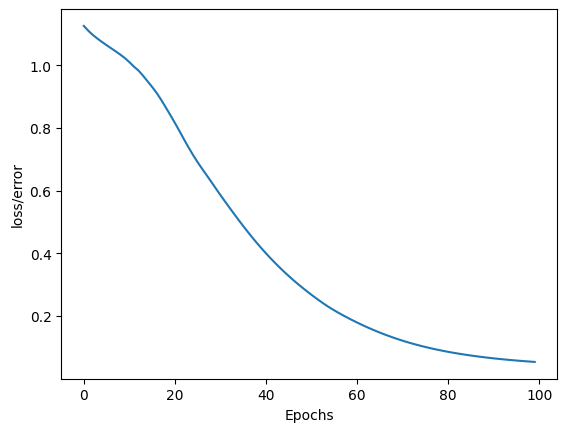

In [53]:
#Graph it out
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('Epochs')

In [54]:
#Evaluate the Model on Test Data Set(i.e Validate the model on test set)
with torch.no_grad(): #basically we are stopping back propogation
  y_eval = model.forward(x_test) #x_test are features from the test datset and y_eval will be the output
  loss = criterion(y_eval,y_test)


In [55]:
loss

tensor(0.1315)

In [60]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)
    #it will tell us what type of flower class our network thinks it is
    print(f'{i+1},{str(y_val)} \t {y_test[i]} \t {y_val.argmax().item() == y_test[i]}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1
  print(correct)


1,tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 True
2,tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 True
3,tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 True
4,tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 True
5,tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 True
6,tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 True
7,tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 True
8,tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 True
9,tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 True
10,tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 True
11,tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 True
12,tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 True
13,tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 True
14,tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 True
15,tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 True
16,tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 False
17,tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 True
18,tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 False
19,tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 True
20,tensor([ 3.4528, -1.2514, -2.3660]) 	 0 	 True
21,tens

In [63]:
#Loading a new data. new data would be like a test data only.
new_data = torch.tensor([5.7,3.2,1.4,0.2])
with torch.no_grad():
  print(model.forward(new_data))

tensor([ 4.7282, -2.3666, -2.9802])


In [64]:
#Save our Neural Network Model.
torch.save(model.state_dict(),"my_first_deep_learning_project.pt")

In [65]:
#Loading the saved model.
new_model = Model()
new_model.load_state_dict(torch.load("my_first_deep_learning_project.pt"))

<All keys matched successfully>

In [66]:
#Evalulate that the correct model we loaded.
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)